# Voting
--- 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비

In [43]:
from sklearn import datasets

iris = datasets.load_iris()

In [44]:
type(iris)

sklearn.utils._bunch.Bunch

In [45]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [46]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
# iris['data']

In [50]:
# iris['DESCR']

In [51]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# 결측치

In [55]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# 중복치

### 학습 분리

In [56]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape,y.shape)

(150, 4) (150,)


In [60]:
from sklearn.model_selection import train_test_split

# data set이 골고루 분리할려고 쓴다. stratify
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2022)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [61]:
# 정규화( 정규화 할때는 무조건 train 데이터만 한다. test데이터셋은 정규화를 시키면 안된다. 트리이기떄문에 정규화는 하지 않는다.)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
y_train = y_train.values

In [67]:
type(X_train)

numpy.ndarray

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()

clf = VotingClassifier(
    estimators=[('knn', clf1), ('svc', clf2), ('tree', clf3)],
    voting='hard',
    weights=[1,1,1])
# weights는 어떤걸 더 영향을 많이줄지 여기선 다 1 이므로 똑같다.


In [70]:
clf.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())],
                 weights=[1, 1, 1])

In [71]:
clf.score(X_train,y_train)

0.9916666666666667

In [74]:
# X_test,y_test 스케일링
# scaler.fit_transform()하면 안됨 fit을 하면 안됨 다시 계산하게된다.
X_test = scaler.transform(X_test)
y_test = y_test.values

In [75]:
y_pred = clf.predict(X_test)

In [76]:
my.print_score(y_test,y_pred,average='weighted')

accuracy: 0.9333333333333333
precision: 0.9444444444444445
recall: 0.9444444444444445


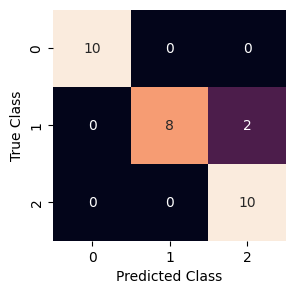

In [77]:
my.plot_confusion_matrix(y_test, y_pred)